In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


# Explatory Data Analysis (EDA)

***Let's start by loading and exploring the dataset.***

* It provides an overview of the dataset and the steps that will be taken for analysis.
* EDA is crucial to understand the structure, trends, and patterns within the data before applying any machine learning models.

In [2]:
import pandas as pd
import numpy as np

# read file
df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_stocks.csv')

# give me information about column, entries and size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862106 entries, 0 to 1862105
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 113.7+ MB


**Let's dive into first 5 rows of the dataset.**

In [3]:
# displays first five rows
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0


**Explatory information such as count, mean, std etc.**

In [4]:
# basic statistical description of the data
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1.767227e+06,1.767227e+06,1.767227e+06,1.767227e+06,1.767227e+06,1.767227e+06
mean,9.606277e+01,1.037073e+02,1.048416e+02,1.025167e+02,1.036881e+02,6.967322e+06
std,2.078800e+02,2.081959e+02,2.106089e+02,2.057010e+02,2.081104e+02,3.311703e+07
min,2.036070e-01,2.220000e-01,2.262500e-01,2.162500e-01,2.180000e-01,0.000000e+00
25%,2.862669e+01,3.472000e+01,3.510000e+01,3.432000e+01,3.472000e+01,1.009900e+06
50%,5.320979e+01,6.222000e+01,6.285000e+01,6.155000e+01,6.221000e+01,2.193400e+06
75%,1.024585e+02,1.126351e+02,1.138000e+02,1.114100e+02,1.126200e+02,5.010600e+06
max,9.485570e+03,9.485570e+03,9.607745e+03,9.437280e+03,9.475010e+03,3.692928e+09


**Below cell shows which variables have how many null values and changes them with median value.**

* Handling missing values is the next step of the process.
* The upcoming code will check for null values and replace them with the **median value,** the best practice for dealing with missing data.

In [5]:
# check for missing values
print(df.isnull().sum())

# select only numeric columns for imputation
numeric_columns = df.select_dtypes(include=[np.number]).columns

# fill missing values for numeric columns with the median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# verify that there are no more missing values in the numeric columns
print(df[numeric_columns].isnull().sum())

Date             0
Symbol           0
Adj Close    94879
Close        94879
High         94879
Low          94879
Open         94879
Volume       94879
dtype: int64
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


**Categorical missing values will be filled with the label 'Unknown' to ensure no missing data remains in the dataset.**

In [6]:
# handle missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Data Preparation for Clustering
**We will prepare the dataset for clustering by selecting the relevant features and normalizing the data.**

* Below code adds new features **('Price Change', 'Pct Change', 'Volatility')** to capture stock price variations and volatility.
* It then selects **numeric columns for clustering** and standardizes them using **StandardScaler** to ensure all features are on the same scale.
* The first five rows of the scaled features are displayed to verify the transformation.

In [7]:
from sklearn.preprocessing import StandardScaler

df['Price Change'] = df['Close'] - df['Open']
df['Pct Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Volatility'] = df['High'] - df['Low']

# select numerical features for clustering
clustering_features = df[['Open', 'High', 'Low', 'Volume', 'Price Change', 'Pct Change', 'Volatility']]

numeric_columns = df.select_dtypes(include=[np.number]).columns
clustering_features = df[numeric_columns]

# standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# check the scaled features
scaled_features[:5]  # Display the first 5 scaled rows

array([[-0.23408525, -0.15849426, -0.16032562, -0.15607249, -0.15817848,
        -0.09553513, -0.02183513, -0.07285455, -0.2887233 ],
       [-0.23551954, -0.16063576, -0.16122124, -0.16011565, -0.15937327,
        -0.10282316, -0.07616036, -0.24943445, -0.17699949],
       [-0.23229247, -0.15581742, -0.15564387, -0.15257116, -0.1549237 ,
        -0.01310289, -0.05490528, -0.17834606, -0.24254483],
       [-0.23212706, -0.1555703 , -0.15906356, -0.15836498, -0.15723089,
        -0.04268482,  0.09153962,  0.29312043, -0.16061349],
       [-0.23049975, -0.15314054, -0.15678378, -0.15344651, -0.15570651,
        -0.08211876,  0.14350269,  0.45866734, -0.25297179]])

# Scaling the Features

**Scaling the features ensures that each feature contributes equally to the clustering process by standardizing them to have the same range (usually between 0 and 1 or with a mean of 0 and standard deviation of 1).**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# K-Means Clustering
**This cell implements K-Means clustering to group companies based on their stock performance.** 

* Below code uses the **elbow method** to find the **optimal number of clusters for K-Means** by iterating over a range of k values.
* **The inertia (sum of squared distances to the nearest cluster center)** is computed for each k and stored for comparison.
* **n_init** is explicitly set to 10 for stable results, and random_state ensures reproducibility.


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

**Visualize Elbow Curve**

* **Visualization of the elbow curve,** plotting the number of **clusters (k)** against the inertia to identify the optimal k.
* The **elbow point (where inertia starts to decrease more slowly)** indicates the best number of clusters.
* The curve bends sharply around **4 clusters,** indicating a significant reduction in inertia at that point.

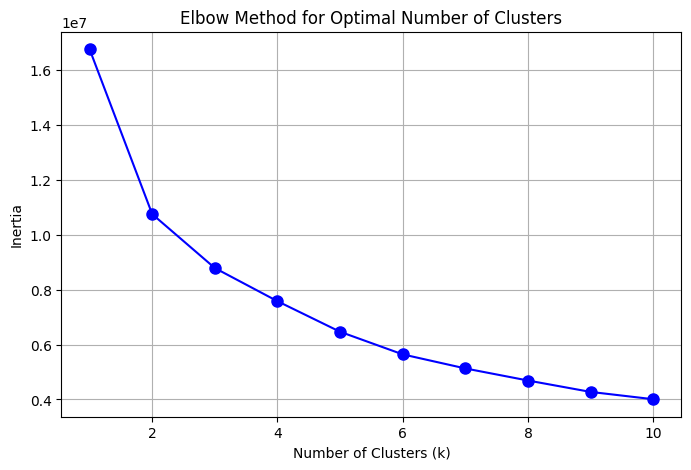

In [10]:
# plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

* KMeans clustering to the scaled features using **4 clusters (as determined by the elbow method).**
* After fitting the KMeans model, **the cluster labels** are assigned to each data point.
* The labels are added as a new column **('Cluster')** in the original DataFrame, and the first few rows with the cluster labels are displayed.

In [11]:
# apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# display the first few rows with the cluster labels
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Price Change,Pct Change,Volatility,Cluster
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0,-0.058525,-0.084241,0.652176,0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0,-0.250832,-0.362312,1.279266,0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0,-0.175591,-0.250365,0.911369,0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0,0.342812,0.492082,1.371239,0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0,0.526756,0.752779,0.852844,0


# Visualization of Clusters

***Now, we perform K-Means clustering to group the stocks into clusters based on the financial metrics.***

# PCA

* After performing PCA, the clusters identified by the KMeans algorithm are plotted in **2D space**, with colors representing different clusters.
* The scatter plot shows **overlapping clusters, indicating that the separation between some clusters might not be distinct.**

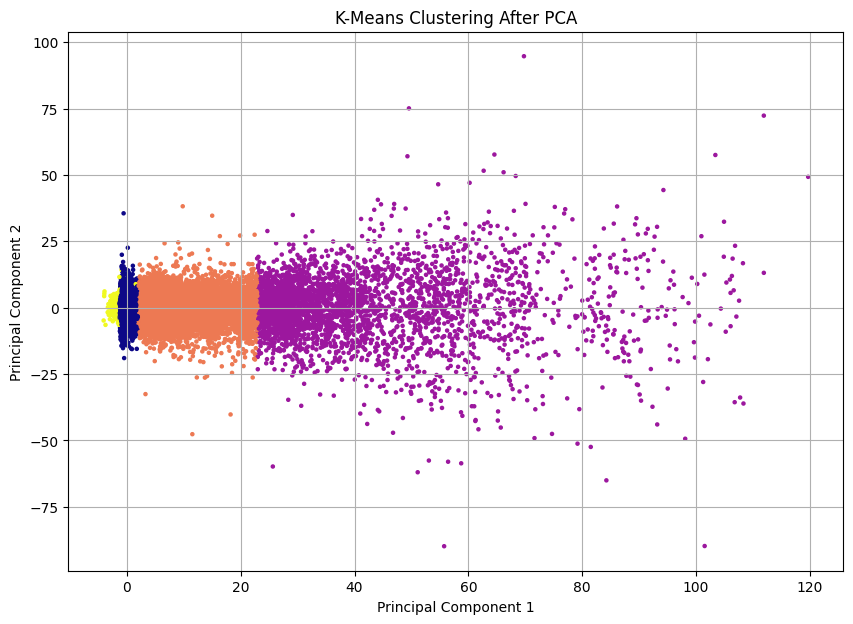

In [12]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Plot the clusters after PCA transformation
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='plasma', s=5)
plt.title('K-Means Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Cluster Evaluation Metrics

**Davies-Bouldin Index (DBI):** This measures to evaluate cluster separation and compactness. Lower values indicate better clustering. A value of 0 means **perfect clustering**, where clusters are well-separated and compact.

* **DBI < 1**: Generally indicates good clustering. Our score of 0.971 suggests that the clusters are distinct and not overly dispersed.

In [13]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin index
db_score = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_score:.3f}')

Davies-Bouldin Index: 0.775
